# Creazione e validazione di un classificatore per la predizione di episodi di ictus

Il dataset utilizzato nel progetto è lo "Stroke Prediction Dataset", che si può trovare su Kaggle.com al link: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset . Questo dataset contiene 11 features cliniche per predirre l'avvenimento di un episodio di Ictus (Stroke). 

## Esplorazione dei dati

Si inizia importando nel notebook le librerie di Python necessarie all'analisi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py #importiamo plotly nella versione offline
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px 
import statsmodels.api as sm 
import pylab as pyl 
import matplotlib.pyplot as plt


Si caricano nel notebook i dati da analizzare. Aprendo il file .csv in modalità testo, si è osservato che il separatore utilizzato è ','.

In [2]:
df = pd.read_table("healthcare-dataset-stroke-data.csv", sep = ",")

Si possono usare i metodi head() e tail() per visualizzare soltanto le prime e le ultime 5 righe della tabella. 

In [3]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
df.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

Si possono conoscere il numero di righe e colonne del dataframe, cioè la sua forma, con il metodo shape.
Si possono stampare tutti i nomi di colonna in un array tramite .columns.values. 

In [5]:
df.shape

(5110, 12)

In [6]:
df.columns.values

array(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'], dtype=object)

Tramite il metodo .info si possono avere maggiore informazioni sul database, incluse la sua forma, il tipo di variabile contenuta in ogni colonna e la quantità di memoria immagazzinata. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Come riportato nel link di kaggle, si fornisce una descrizione dei parametri contenuti nel dataset: 
1. id: id identificativo
2. gender: "Male", "Female" or "Other"
3. age: età del paziente
4. hypertension: 0 se il paziente non soffre di ipertensione, 1 se il paziente soffre di ipertensione
5. heart_disease: 0 se il paziente non ha nessuna malattia cardiaca, 1 se il paziente ha una malattia cardiaca 
6. ever_married: "No" se non è mai stato sposato, "Yes" se è stato sposato
7. work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"
8. Residence_type : "Rural" or "Urban"
9. avg_glucose_level: livello medio di glucosio nel sangue
10. bmi: indice di massa corporea
11. smoking_status: "formerly smoked", "never smoked", "smokes" o "Unknown" (nel caso in cui l'informazione non sia disponibile)
12. stroke: 1 se il paziente ha avuto un ictus, 0 se non l'ha mai avuto

Con il metodo describe() si effettua un riepilogo dei valori contenuti nelle colonne numeriche.

In [8]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

Con il metodo di Pandas "unique" si può verificare il contenuto delle colonne che contengono stringhe, contando quante diverse descrizioni ci sono nei dati, e invece con il metodo value_counts() si conta quante volte appare ogni singola descrizione.

**Gender** 

In [9]:
pd.unique(df.gender)

array(['Male', 'Female', 'Other'], dtype=object)

In [10]:
print(len(pd.unique(df.gender)))

3


In [11]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

**ever_married**

In [12]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
print(len(pd.unique(df.ever_married)))

2


In [14]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

**work_type**

In [15]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
print(len(pd.unique(df.work_type)))

5


In [17]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

**Residence_type** 

In [18]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [19]:
print(len(pd.unique(df.Residence_type)))

2


In [20]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

**smoking_status**

In [21]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [22]:
print(len(pd.unique(df.smoking_status)))

4


In [23]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

I campi "hypertension", "heart_disease" e "stroke", pur contenendo campi numerici, contengono solo 0 o 1,quindi può essere interessante vedere quante volte si presenta ciascuno dei due valori. 

In [24]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [25]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [26]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

Dal metodo info si può osservare che nel campo bmi ci sono alcuni elementi nulli. 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Osservando gli elementi del dataset, si nota che gli elementi con valore 1 per lo stroke sono presenti nella parte iniziale del database (primi 250 elementi). Anche una parte dei Nan nella categoria bmi sono presenti nella parte iniziale del database (45). Per non diminuire drasticamente i valori di elementi con stroke =1 per ora si decide di non eliminarli, per non ridurre eccessivamente gli elementi in cui si è individuato uno stroke.

In [28]:
count_initial_null = 0
elementi_nan = df['bmi'].isnull().values
print(elementi_nan[1])
for i in range(0,500):
    if elementi_nan[i] == True:
        count_initial_null+=1
        
print(count_initial_null)

True
45


Si procede alla ricerca di eventuali osservazioni duplicate.

In [29]:
dup = df.duplicated()
print(dup)
ind_duplex = []
for i in range (0,len(dup)):
    if dup[i] is True:
        ind_duplex.append(i)
        
print("Indici delle righe ripetute: ")
print(ind_duplex)

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool
Indici delle righe ripetute: 
[]


Si osserva che non vi sono valori ripetuti. 

### Visualizzazione grafica dei dati 

Per avere una panoramica generale del contenuto del dataset, si prova a rappresentarne graficamente il contenuto.

([<matplotlib.patches.Wedge at 0x7fc73a931310>,
 [Text(-0.29329231703931646, 1.0601790493901062, 'Female'),
  Text(0.2926404138262685, -1.0603591788613849, 'Male'),
  Text(1.099999792043413, -0.0006763907511957427, 'Others')],
 [Text(-0.15997762747599079, 0.5782794814855124, '58.6%'),
  Text(0.15962204390523732, -0.5783777339243917, '41.4%'),
  Text(0.5999998865691343, -0.00036894040974313233, '0.0%')])

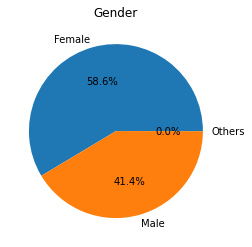

In [30]:
plt.title('Gender')
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male', 'Others'], autopct='%1.1f%%')

([<matplotlib.axis.XTick at 0x7fc73fb8bd60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

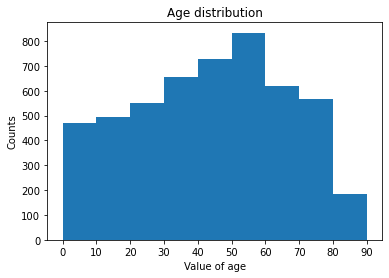

In [31]:
plt.title('Age distribution')
mybin = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
plt.hist(df['age'], bins=mybin)
plt.xlabel('Value of age')
plt.ylabel('Counts')
plt.xticks(mybin)

([<matplotlib.patches.Wedge at 0x7fc73fd03940>,
 [Text(-0.5182755321100738, 0.9702527881001013, 'Yes'),
  Text(0.5182756229516939, -0.9702527395756395, 'No')],
 [Text(-0.28269574478731296, 0.5292287935091461, '65.6%'),
  Text(0.2826957943372876, -0.5292287670412579, '34.4%')])

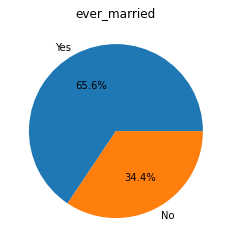

In [32]:
plt.title('ever_married')
plt.pie(df['ever_married'].value_counts(), labels=['Yes', 'No'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc73fbe0cd0>,
 [Text(-0.24806852328675594, 1.0716631969767034, 'Private'),
  Text(-0.6322566579485418, -0.9001397216431128, 'Self-employed'),
  Text(0.3392755763648914, -1.0463709109499704, 'Children'),
  Text(0.9994171384323685, -0.4595273478343333, 'Government job'),
  Text(1.0998993881382721, -0.01487736445256784, 'Never Worked')],
 [Text(-0.13531010361095777, 0.5845435619872926, '57.2%'),
  Text(-0.34486726797193185, -0.49098530271442514, '16.0%'),
  Text(0.18505940528994078, -0.5707477696090747, '13.4%'),
  Text(0.54513662096311, -0.25065128063690906, '12.9%'),
  Text(0.5999451208026939, -0.008114926065037002, '0.4%')])

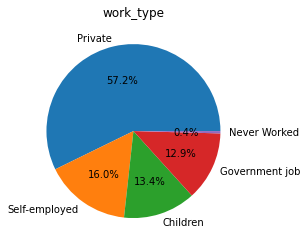

In [33]:
plt.title('work_type')
plt.pie(df['work_type'].value_counts(), labels = ['Private', 'Self-employed', 'Children', 'Government job', 'Never Worked' ], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc73fd285b0>,
 [Text(-0.02772429096401782, 1.0996505643569428, 'Urban'),
  Text(0.027724393920734242, -1.0996505617612025, 'Rural')],
 [Text(-0.0151223405258279, 0.5998093987401505, '50.8%'),
  Text(0.015122396684036858, -0.5998093973242922, '49.2%')])

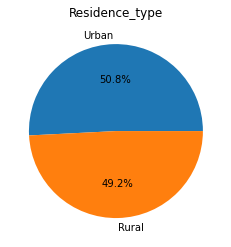

In [34]:
plt.title('Residence_type')
plt.pie(df['Residence_type'].value_counts(), labels = ['Urban', 'Rural'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc73fdb9dc0>,
 [Text(0.4360557107141461, 1.0098789121244096, 'never smoked'),
  Text(-1.0901353192802539, -0.14698634514042241, 'Unknown'),
  Text(0.0621837781835764, -1.0982409470288457, 'formerly smoked'),
  Text(0.9731055953448219, -0.512899113187574, 'smokes')],
 [Text(0.2378485694804433, 0.5508430429769506, '37.0%'),
  Text(-0.5946192650619565, -0.08017437007659405, '30.2%'),
  Text(0.03391842446376894, -0.5990405165611885, '17.3%'),
  Text(0.5307848701880846, -0.2797631526477676, '15.4%')])

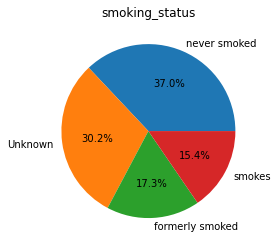

In [35]:
plt.title('smoking_status')
plt.pie(df['smoking_status'].value_counts(), labels = ['never smoked', 'Unknown', 'formerly smoked', 'smokes'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc73ffbc100>,
 [Text(-1.0488454518125865, 0.3315467059285184, '0 (no hypertension)'),
  Text(1.0488454440521755, -0.33154673047851824, '1 (hypertension)')],
 [Text(-0.5720975191705017, 0.18084365777919187, '90.3%'),
  Text(0.5720975149375501, -0.18084367117010083, '9.7%')])

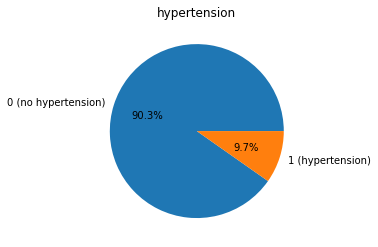

In [36]:
plt.title('hypertension')
plt.pie(df['hypertension'].value_counts(), labels = ['0 (no hypertension)', '1 (hypertension)'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc740040430>,
 [Text(-1.0842021913429936, 0.18575685259782704, '0 (no heart disease)'),
  Text(1.0842021804731095, -0.1857569160417862, '1 (heart disease)')],
 [Text(-0.5913830134598146, 0.10132191959881473, '94.6%'),
  Text(0.5913830075307869, -0.10132195420461064, '5.4%')])

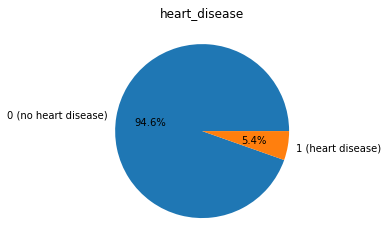

In [37]:
plt.title('heart_disease')
plt.pie(df['heart_disease'].value_counts(), labels = ['0 (no heart disease)', '1 (heart disease)'], autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc7400f3790>,
 [Text(-1.0871361453364168, 0.16773491438301513, '0 (no stroke)'),
  Text(1.087136143373357, -0.16773492710614463, '1 (stroke)')],
 [Text(-0.5929833520016818, 0.0914917714816446, '95.1%'),
  Text(0.592983350930922, -0.09149177842153342, '4.9%')])

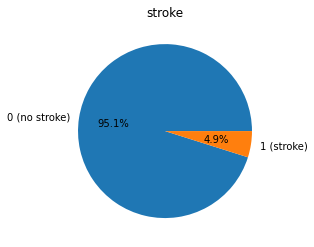

In [38]:
plt.title('stroke')
plt.pie(df['stroke'].value_counts(), labels = ['0 (no stroke)', '1 (stroke)'], autopct='%1.1f%%')

([<matplotlib.axis.XTick at 0x7fc7401a2ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

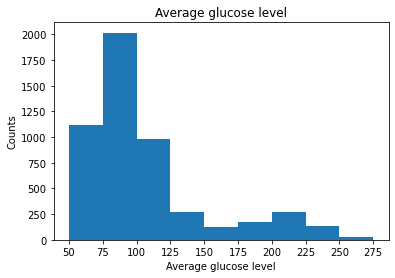

In [39]:
plt.title('Average glucose level')
mybin = [50, 75, 100, 125, 150, 175, 200, 225, 250, 275]
plt.hist(df['avg_glucose_level'], bins=mybin)
plt.xlabel('Average glucose level')
plt.ylabel('Counts')
plt.xticks(mybin)

([<matplotlib.axis.XTick at 0x7fc73ff268e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

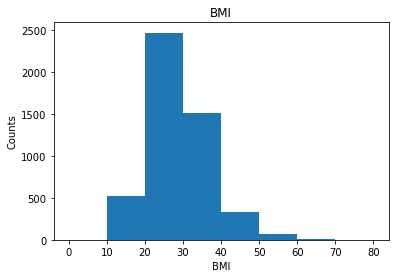

In [40]:
plt.title('BMI')
mybin = [0, 10, 20, 30, 40, 50, 60, 70, 80]
plt.hist(df['bmi'], bins=mybin)
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.xticks(mybin)

### Analisi grafica dei dati

Si realizzano dei boxplot per le variabili numeriche, per analizzare la loro distribuzione ed osservare i quantili. Combinando le variabili, si possono analizzare diversi parametri. 

In [41]:
fig = px.box(df, x= 'gender', y= 'age', color = 'stroke', title = 'Distribution of the age of the patients according to the gender, divided between patients with or without stroke')
fig.show()

In [42]:
fig = px.box(df, x= 'hypertension', y= 'age', color = 'stroke', title = 'Distribution of the age of the patients according to the hypertension state, divided between patients with or without stroke')
fig.show()

In [43]:
fig = px.box(df, x= 'heart_disease', y= 'age', color = 'stroke', title = 'Distribution of the age of the patients according to the presence or absence of heart disease, divided between patients with or without stroke')
fig.show()

In [44]:
fig = px.box(df, x= 'gender', y= 'avg_glucose_level', color = 'stroke', title = 'Distribution of the glucose level of the patients according to the gender, divided between patients with or without stroke')
fig.show()

In [45]:
fig = px.box(df, x= 'gender', y= 'bmi', color = 'stroke', title = 'Distribution of the bmi of the patients according to the gender, divided between patients with or without stroke')
fig.show()

In [46]:
fig = px.box(df, x= 'work_type', y= 'age', color = 'stroke', title = 'Distribution of the age of the patients according to the work, divided between patients with or without stroke')
fig.show()

In [47]:
fig = px.box(df, x= 'smoking_status', y= 'age', color = 'stroke', title = 'Distribution of the age of the patients according to the work, divided between patients with or without stroke')
fig.show()

Si realizza una serie di istogrammi per osservare la distribuzione percentuali delle variabili precedenti in caso di pazienti con e senza stroke. 

In [48]:
fig = px.histogram(df,  
            x="gender", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale del genere in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [49]:
fig = px.histogram(df,  
            x="work_type", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale del worktype in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [50]:
fig = px.histogram(df,  
            x="smoking_status", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale dello smoking status in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [51]:
fig = px.histogram(df,  
            x="Residence_type", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale del residence type in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [52]:
fig = px.histogram(df,  
            x="ever_married", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale dello stato di matrimonio in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [53]:
fig = px.histogram(df,  
            x="hypertension", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale dello stato di ipertensione in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [54]:
fig = px.histogram(df,  
            x="age", 
            color="stroke", 
            barmode="group",
            nbins=10,
            title="Distribuzione percentuale dell'età in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [55]:
fig = px.histogram(df,  
            x="avg_glucose_level", 
            color="stroke", 
            barmode="group",
            nbins=15,
            title="Distribuzione percentuale dell'average glucose level in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [56]:
fig = px.histogram(df,  
            x="bmi", 
            color="stroke", 
            barmode="group",
            nbins=10,
            title="Distribuzione percentuale del bmi in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

In [57]:
fig = px.histogram(df,  
            x="heart_disease", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale della presenza di malattie cardiache in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
fig.show()

Usando grafici, si provano ad individuare andamenti e relazioni tra le variabili del dataset. 
Inizialmente si provano a considerare solo i primi 500 elementi del dataset, per visualizzarne meglio le variabili. 

In [58]:
df_copy = df.copy()
df_small = df_copy[0:500] 
df_small

id  gender   age  hypertension  heart_disease ever_married  \
0     9046    Male  67.0             0              1          Yes   
1    51676  Female  61.0             0              0          Yes   
2    31112    Male  80.0             0              1          Yes   
3    60182  Female  49.0             0              0          Yes   
4     1665  Female  79.0             1              0          Yes   
..     ...     ...   ...           ...            ...          ...   
495  34299  Female  71.0             0              0          Yes   
496  54375    Male   5.0             0              0           No   
497  37832  Female  14.0             0              0           No   
498  21058  Female  15.0             0              0           No   
499   7696  Female  66.0             0              0           No   

         work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Private          Urban             228.69  36.6  formerly smoked   
1    Self-employed          Rural             202.21   NaN     never smoked   
2          Private          Rural             105.92  32.5     never smoked   
3          Private          Urban             171.23  34.4           smokes   
4    Self-employed          Rural             174.12  24.0     never smoked   
..             ...            ...                ...   ...              ...   
495        Private          Urban              93.28  34.7     never smoked   
496       children          Rural             122.19  35.0          Unknown   
497       children          Rural             129.53  21.3     never smoked   
498       children          Rural             114.53  29.1          Unknown   
499        Private          Urban              93.73  23.9           smokes   

     stroke  
0         1  
1         1  
2         1  
3         1  
4         1  
..      ...  
495       0  
496       0  
497       0  
498       0  
499       0  

[500 rows x 12 columns]

Si realizza una heatmap in cui sull'asse x ho il BMI, su y l'età e in z ho la somma di hypertension e heart_disease. Sommando i due parametri, si ottiene 0 quando il paziente non ha ne una malattia cardiaca ne ipertensione, 1 quando il paziente ha una sola delle due condizioni e 2 quando le ha entrambe. 

In [59]:
elements = list(np.arange(0,500))
bmi = list(df_small['bmi']) 
hyp = list(df_small['hypertension'])
hd = list(df_small['heart_disease'])
hd_hyp = list(df_small['hypertension']+df_small['heart_disease'])

#print(hd_hyp)
age = list(df_small['age'])
trace = go.Heatmap(z=hd_hyp, y = age, x = bmi, colorscale = 'Bluered')
data = [trace]
py.iplot(data)

Il grafico non risulta essere molto significativo. 

Si cercano di individuare possibili relazioni tra le variabili numeriche a disposizione. 

Text(0, 0.5, 'Age')

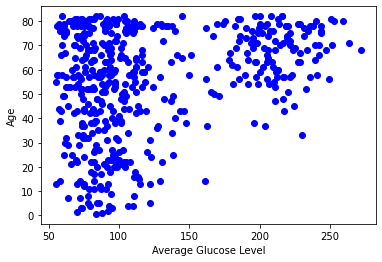

In [60]:
glucose = list(df_small['avg_glucose_level'])
#bmi = list(df['bmi'])
age = list(df_small['age'])
plt.plot(glucose, age, 'bo')
plt.xlabel('Average Glucose Level')
plt.ylabel('Age')

Visivamente sembrano esserci due cluster in base al livello di glucosio, i pazienti in cui esso è alto risultano essere pazienti anziani. Siccome però anche tra i pazienti in cui il livello di glucosio è basso ci sono molti pazienti con un'età elevata, non ritengo di poter trovare una correlazione. 

Text(0, 0.5, 'Age')

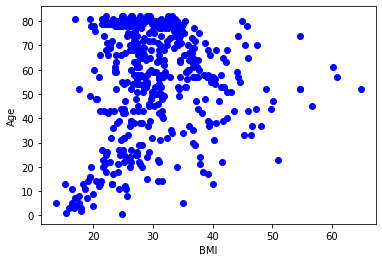

In [61]:
#glucose = list(df_small['avg_glucose_level'])
bmi = list(df_small['bmi'])
age = list(df_small['age'])
plt.plot(bmi, age, 'bo')
plt.xlabel('BMI')
plt.ylabel('Age')

Text(0, 0.5, 'Average Glucose Level')

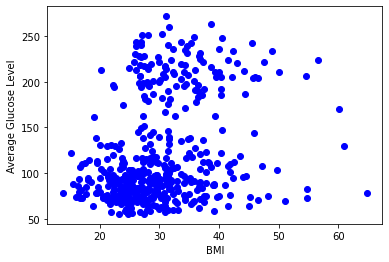

In [62]:
glucose = list(df_small['avg_glucose_level'])
bmi = list(df_small['bmi'])
#age = list(df_small['age'])
plt.plot(bmi, glucose, 'bo')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')

Anche in questi altri due grafici non si riescono a trovare delle correlazioni degne di nota. 

### Trasformazione del dataset e tentativo di creazione di una nuova variabile

Si trasformano in numeriche le variabili binarie che sono espresse sotto forma di stringa. 

**Gender**: Male diventa 0, Female diventa 1 

In [63]:
df_mod = df.copy()
df_mod['genderN'] = np.where(df['gender']=='Male',0,1)

**Ever_married**: Yes diventa 0, No diventa 1

In [64]:
df_mod['ever_marriedN'] = np.where(df['ever_married']=='Yes',0,1)
df_mod

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  
0          1        0              0  
1          1        1              0  
2          1        0              0  
3          1        1              0  
4          1        1              0  
...      ...      ...            ...  
5105       0        1              0  
5106       0        1              0  
5107       0        1              0  
5108       0        0              0  
5109       0        1              0  

[5110 rows x 14 columns]

**Residence_type**: Urban diventa 1, Rural diventa 0

In [65]:
df_mod['Residence_typeN'] = np.where(df['Residence_type']=='Urban',1,0)
df_mod

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  Residence_typeN  
0          1        0              0                1  
1          1        1              0                0  
2          1        0              0                0  
3          1        1              0                1  
4          1        1              0                0  
...      ...      ...            ...              ...  
5105       0        1              0                1  
5106       0        1              0                1  
5107       0        1              0                0  
5108       0        0              0                0  
5109       0        1              0                1  

[5110 rows x 15 columns]

Si vogliono combinare le variabili binarie/categoriche in una vaiabile che tenga conto dei fattori di rischio. 
Da una breve ricerca bibliografica si evidenzia che tra i fattori di rischio principali di ictus ci sono l'alta pressione sanguigna, il diabete, le malattie cardiache, il fumo, l'abitare in una zona dove l'aria è inquinata (https://www.nhlbi.nih.gov/health-topics/stroke#:~:text=The%20major%20risk%20factors%20for%20stroke%20include%3A%20High,or%20TIA.%20Brain%20aneurysms%20or%20arteriovenous%20malformations%20%28AVMs%29.). Le persone non sposate hanno un rischio maggiore di avere un ictus rispetto alle persone sposate (https://pubmed.ncbi.nlm.nih.gov/29492956/). 
Per quanto riguarda il sesso e il tipo di impiego, il discorso è più complesso quindi per ora trascurerò questi due parametri nel calcolo di questo parametro chiamato "indice di rischio". 
Le variabili binarie precedentemente convertite in variabili numeriche sono stata convertite assegnando 0 al valore che non corrisponde a un fattore di rischio e 1 al valore che corrisponde al fattore di rischio.

**Smoking status**: Unknown e never smoked diventano 0, formerly smoked diventa 1, smokes diventa 2. 

In [66]:
# create a list of our conditions
conditions = [
    (df_mod['smoking_status'] == 'Unknown') | (df_mod['smoking_status'] == 'never smoked'),
    (df_mod['smoking_status'] == 'formerly smoked'),
    (df_mod['smoking_status'] == 'smokes'),
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2]

# create a new column and use np.select to assign values to it using our lists as arguments
df_mod['smoking_statusN'] = np.select(conditions, values)
df_mod

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  Residence_typeN  smoking_statusN  
0          1        0              0                1                1  
1          1        1              0                0                0  
2          1        0              0                0                0  
3          1        1              0                1                2  
4          1        1              0                0                0  
...      ...      ...            ...              ...              ...  
5105       0        1              0                1                0  
5106       0        1              0                1                0  
5107       0        1              0                0                0  
5108       0        0              0                0                1  
5109       0        1              0                1                0  

[5110 rows x 16 columns]

Semplicisticamente, si assume che tutti i fattori di rischio considerati abbiano lo stesso peso. Si crea la nuova colonna "risk_factor" sommando le colonne "hypertension", "heart_disease", "ever_marriedN", "Residence_typeN" e "smoking_statusN".

In [67]:
df_mod['risk_factor'] = df_mod['hypertension'] + df_mod['heart_disease'] + df_mod['ever_marriedN'] + df_mod["Residence_typeN"] + df_mod["smoking_statusN"]
df_mod

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  Residence_typeN  smoking_statusN  \
0          1        0              0                1                1   
1          1        1              0                0                0   
2          1        0              0                0                0   
3          1        1              0                1                2   
4          1        1              0                0                0   
...      ...      ...            ...              ...              ...   
5105       0        1              0                1                0   
5106       0        1              0                1                0   
5107       0        1              0                0                0   
5108       0        0              0                0                1   
5109       0        1              0                1                0   

      risk_factor  
0               3  
1               0  
2               1  
3               3  
4               1  
...           ...  
5105            2  
5106            1  
5107            0  
5108            1  
5109            1  

[5110 rows x 17 columns]

Si analizza in un'istogramma la distribuzione di questa variabile.

([<matplotlib.axis.XTick at 0x7fc73fc7e550>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

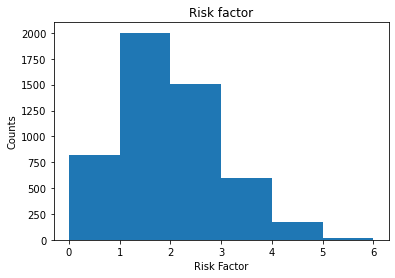

In [68]:
plt.title('Risk factor')
mybin = [0, 1, 2, 3, 4, 5, 6]
plt.hist(df_mod['risk_factor'], bins=mybin)
plt.xlabel('Risk Factor')
plt.ylabel('Counts')
plt.xticks(mybin)

Si analizza la distribuzione della variabile (in termini di percentuale, non eseguendo un semplice conteggio) dividendo i pazienti in quelli che hanno avuto un ictus e quelli che non l'hanno avuto. 

In [69]:
fig = px.histogram(df_mod,  
            x="risk_factor", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale del risk factor in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
#fig.update_layout(yaxis_title="Number of Visitors")
#fig.update_xaxes(type='category')
fig.show()

Si osserva che il risk factor è più basso in maggioranza nei pazienti che non hanno avuto un ictus, mentre è più alto in maggioranza per i pazienti che hanno avuto un ictus. Tuttavia, non la si ritiene un informazione particolarmente utile per l'analisi.

Si prova a calcolare un risk factor più significativo tramite una media pesata, considerando i fattori come indipendenti e usando come peso la percentuale di persone che hanno avuto uno stroke avendo in presenza di un certo fattore di rischio. Si crea dunque una parte di dataset con soltanto i soggetti che hanno avuto stroke e procediamo con il calcolo delle percentuali. 

In [70]:
df_mod_copy = df_mod.copy()
df_mod_stroke = df_mod_copy[(df_mod_copy['stroke']==1)]
df_mod_stroke
#calcolo delle percentuali
W_hyp = ((df_mod_stroke["hypertension"]==1).sum())/250
W_hd = ((df_mod_stroke["heart_disease"]==1).sum())/250
W_m = ((df_mod_stroke["ever_marriedN"]==1).sum())/250
W_r = ((df_mod_stroke["Residence_typeN"]==1).sum())/250
W_s1 = ((df_mod_stroke["smoking_statusN"]==1).sum())/250
W_s2 = ((df_mod_stroke["smoking_statusN"]==2).sum())/250

#print(W_hyp)
#print(W_hd)
#print(W_m)
#print(W_r)
#print(W_s1)
#print(W_s2)

Dato che per la variabile "smoke_factor" si possono avere 3 valori e non due, si crea una nuova colonna del dataframe per assegnare la probabilità/il peso da usare nei tre casi diversi. 

In [71]:
conditions = [
    (df_mod['smoking_status'] == 'Unknown') | (df_mod['smoking_status'] == 'never smoked'),
    (df_mod['smoking_status'] == 'formerly smoked'),
    (df_mod['smoking_status'] == 'smokes'),
    ]

# create a list of the values we want to assign for each condition
values = [(1-W_s1-W_s2), W_s1, W_s2]

# create a new column and use np.select to assign values to it using our lists as arguments
df_mod['W_smoking_statusN'] = np.select(conditions, values)
df_mod

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  Residence_typeN  smoking_statusN  \
0          1        0              0                1                1   
1          1        1              0                0                0   
2          1        0              0                0                0   
3          1        1              0                1                2   
4          1        1              0                0                0   
...      ...      ...            ...              ...              ...   
5105       0        1              0                1                0   
5106       0        1              0                1                0   
5107       0        1              0                0                0   
5108       0        0              0                0                1   
5109       0        1              0                1                0   

      risk_factor  W_smoking_statusN  
0               3              0.280  
1               0              0.552  
2               1              0.552  
3               3              0.168  
4               1              0.552  
...           ...                ...  
5105            2              0.552  
5106            1              0.552  
5107            0              0.552  
5108            1              0.280  
5109            1              0.552  

[5110 rows x 18 columns]

Usando i pesi, si crea la nuova variabile "risk_factorW".

In [72]:
df_mod['risk_factorW'] = (W_hyp*df_mod['hypertension']) + (W_hd*df_mod['heart_disease']) + (W_m*df_mod['ever_marriedN']) + (W_r*df_mod["Residence_typeN"]) + (df_mod["W_smoking_statusN"]*df_mod["smoking_statusN"])

df_mod['risk_factorW'].max()

1.4440000000000002

In [73]:
df_mod['risk_factorW'].min()

0.0

Considerando che il massimo della nuova variabile è 1.44, si osservano la distribuzione e l'andamento della nuova variabile.

([<matplotlib.axis.XTick at 0x7fc73fc62a60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

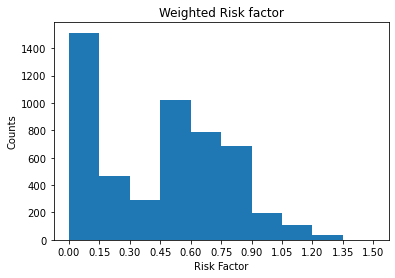

In [74]:
plt.title('Weighted Risk factor')
mybin = [0, 0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1.05, 1.2, 1.35, 1.5]
plt.hist(df_mod['risk_factorW'], bins=mybin)
plt.xlabel('Risk Factor')
plt.ylabel('Counts')
plt.xticks(mybin)

Si analizza la distribuzione della variabile (in termini di percentuale, non eseguendo un semplice conteggio) dividendo i pazienti in quelli che hanno avuto un ictus e quelli che non l'hanno avuto. 

In [75]:
fig = px.histogram(df_mod,  
            x="risk_factorW", 
            color="stroke", 
            barmode="group",
            nbins=6,
            title="Distribuzione percentuale del risk factor in pazienti con stroke (1) e senza stroke (0)",
            histnorm="percent")
#fig.update_layout(yaxis_title="Number of Visitors")
#fig.update_xaxes(type='category')
fig.show()

Ora si osserva la distribuzione percentuale dell'average glucose level nei pazienti con e senza ictus.

In [76]:
fig = px.histogram(df_mod,  
            x="avg_glucose_level", 
            color="stroke", 
            barmode="group",
            title="Distribuzione percentuale dell'average glucose level in pazienti con stroke (1) e senza stroke (0)",
            histnorm = "percent"      
                  )
fig.show()

Anche in questo caso si nota che il livello di glucosio nel sangue risulta più alto per i pazienti che hanno avuto un ictus. 

Ora si osserva la distribuzione percentuale del bmi nei pazienti con e senza ictus.

In [77]:
fig = px.histogram(df_mod,  
            x="bmi", 
            color="stroke", 
            nbins = 10,
            barmode="group",
            title="Distribuzione percentuale del bmi in pazienti con stroke (1) e senza stroke (0)",
            histnorm = "percent"      
                  )
fig.show()

Si prova a realizzare una heatmap in cui sull'asse x c'è l'età, su y l'average glucose level e in z la variabile appena costruita di fattore di rischio, che va da un minimo di 0 a un massimo (teorico) di 6 (il vero valore massimo è di 1.44). Si considerano di nuovo soltanto i primi 500 pazienti. 

In [78]:
#elements = list(np.arange(0,500))
bmi = list(df_small['bmi'])
age = list(df_small['age'])
avg_glu = list(df_small['avg_glucose_level'])
risk = list(df_mod['risk_factor'][0:500])

trace = go.Heatmap(z=risk, y = avg_glu, x = age, colorscale = 'Bluered')
data = [trace]
py.iplot(data)

Si realizza una heatmap simile alla precedente, con l'età sull'asse x, su y il bmi e in z il fattore di rischio, che va da un minimo di 0 a un massimo (teorico) di 6. Si considera di nuovo soltanto i primi 500 pazienti.

In [79]:
#elements = list(np.arange(0,500))
bmi = list(df_small['bmi'])
age = list(df_small['age'])
avg_glu = list(df_small['avg_glucose_level'])
risk = list(df_mod['risk_factor'][0:500])

trace = go.Heatmap(z=risk, y = bmi, x = age, colorscale = 'Bluered')
data = [trace]
py.iplot(data)

Anche dagli ultimi grafici e dalla creazione del fattore di rischio pesato non si sono individuate significative relazioni tra i parametri.

## Applicazione di un modello di regressione logistica.


Per poter applicare un modello di regressione logistica, si trasformano in forma numerica tutte le variabili del dataframe. 

In [80]:
df_rl = df_mod.copy()
df_rl

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  Residence_typeN  smoking_statusN  \
0          1        0              0                1                1   
1          1        1              0                0                0   
2          1        0              0                0                0   
3          1        1              0                1                2   
4          1        1              0                0                0   
...      ...      ...            ...              ...              ...   
5105       0        1              0                1                0   
5106       0        1              0                1                0   
5107       0        1              0                0                0   
5108       0        0              0                0                1   
5109       0        1              0                1                0   

      risk_factor  W_smoking_statusN  risk_factorW  
0               3              0.280         1.008  
1               0              0.552         0.000  
2               1              0.552         0.188  
3               3              0.168         0.876  
4               1              0.552         0.264  
...           ...                ...           ...  
5105            2              0.552         0.804  
5106            1              0.552         0.540  
5107            0              0.552         0.000  
5108            1              0.280         0.280  
5109            1              0.552         0.540  

[5110 rows x 19 columns]

L'unica variabile ancora in forma letterale è il work_type. Viene convertita dunque in variabile numerica, attribuendo un valore più basso ai valori che, dal grafico della distribuzione percentuale in relazione ai pazienti con o senza stroke precedentemente analizzato, potrebbero sembrare meno legati alla presenza di stroke. 
Never_worked = 0, children = 1, Govt_job = 2, Private = 3, Self-employed = 4

In [81]:
conditions = [
    (df_mod['work_type'] == 'Never_worked'),
    (df_mod['work_type'] == 'children'),
    (df_mod['work_type'] == 'Govt_job'),
    (df_mod['work_type'] == 'Private'),
    (df_mod['work_type'] == 'Self-employed'),
    ]

# create a list of the values we want to assign for each condition
values = [0, 1, 2, 3, 4]


# create a new column and use np.select to assign values to it using our lists as arguments
df_mod['work_typeN'] = np.select(conditions, values)
df_mod

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  Residence_typeN  smoking_statusN  \
0          1        0              0                1                1   
1          1        1              0                0                0   
2          1        0              0                0                0   
3          1        1              0                1                2   
4          1        1              0                0                0   
...      ...      ...            ...              ...              ...   
5105       0        1              0                1                0   
5106       0        1              0                1                0   
5107       0        1              0                0                0   
5108       0        0              0                0                1   
5109       0        1              0                1                0   

      risk_factor  W_smoking_statusN  risk_factorW  work_typeN  
0               3              0.280         1.008           3  
1               0              0.552         0.000           4  
2               1              0.552         0.188           3  
3               3              0.168         0.876           3  
4               1              0.552         0.264           4  
...           ...                ...           ...         ...  
5105            2              0.552         0.804           3  
5106            1              0.552         0.540           4  
5107            0              0.552         0.000           4  
5108            1              0.280         0.280           3  
5109            1              0.552         0.540           2  

[5110 rows x 20 columns]

In [82]:
df_rl = df_mod.copy()
df_rl

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  genderN  ever_marriedN  Residence_typeN  smoking_statusN  \
0          1        0              0                1                1   
1          1        1              0                0                0   
2          1        0              0                0                0   
3          1        1              0                1                2   
4          1        1              0                0                0   
...      ...      ...            ...              ...              ...   
5105       0        1              0                1                0   
5106       0        1              0                1                0   
5107       0        1              0                0                0   
5108       0        0              0                0                1   
5109       0        1              0                1                0   

      risk_factor  W_smoking_statusN  risk_factorW  work_typeN  
0               3              0.280         1.008           3  
1               0              0.552         0.000           4  
2               1              0.552         0.188           3  
3               3              0.168         0.876           3  
4               1              0.552         0.264           4  
...           ...                ...           ...         ...  
5105            2              0.552         0.804           3  
5106            1              0.552         0.540           4  
5107            0              0.552         0.000           4  
5108            1              0.280         0.280           3  
5109            1              0.552         0.540           2  

[5110 rows x 20 columns]

Si possono rimuovere le colonne non necessarie, cioè l'id, le colonne che contengono le variabili in forma letteraria (ever_married, work_type, Residence_type, smoking_status). Si rimuovono anche le variabili precedentemente create, cioè il risk factor, il risk factor pesato e la probabilità.

In [83]:
df_rl = df_rl.drop(['id','gender','ever_married','work_type', 'Residence_type', 'smoking_status', 'risk_factor', 'W_smoking_statusN', 'risk_factorW'], axis=1)
df_rl

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     61.0             0              0             202.21   NaN       1   
2     80.0             0              1             105.92  32.5       1   
3     49.0             0              0             171.23  34.4       1   
4     79.0             1              0             174.12  24.0       1   
...    ...           ...            ...                ...   ...     ...   
5105  80.0             1              0              83.75   NaN       0   
5106  81.0             0              0             125.20  40.0       0   
5107  35.0             0              0              82.99  30.6       0   
5108  51.0             0              0             166.29  25.6       0   
5109  44.0             0              0              85.28  26.2       0   

      genderN  ever_marriedN  Residence_typeN  smoking_statusN  work_typeN  
0           0              0                1                1           3  
1           1              0                0                0           4  
2           0              0                0                0           3  
3           1              0                1                2           3  
4           1              0                0                0           4  
...       ...            ...              ...              ...         ...  
5105        1              0                1                0           3  
5106        1              0                1                0           4  
5107        1              0                0                0           4  
5108        0              0                0                1           3  
5109        1              0                1                0           2  

[5110 rows x 11 columns]

Resta il problema dei valori NaN in bmi. Si prova a sostituirli con il valore medio. 

In [84]:
df_rl['bmi'].fillna((df_rl['bmi'].mean()), inplace=True)
df_rl['bmi'].mean()

28.89323691179472

Viene creata una colonna da usare come intercetta. 

In [85]:
df_rl['intr']=1
df_rl.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  28.893237       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   genderN  ever_marriedN  Residence_typeN  smoking_statusN  work_typeN  intr  
0        0              0                1                1           3     1  
1        1              0                0                0           4     1  
2        0              0                0                0           3     1  
3        1              0                1                2           3     1  
4        1              0                0                0           4     1

Si applica ora il modello di regressione logistica. 
Nella regressione logistica si trova un coefficiente per ogni predittore che considereremo

$y= b_0 + b_1 age +  b_2 hypertension + b_3 heart disease + b_4 avg glucose level + b_5 bmi + b_6 genderN + b_7 ever marriedN + b_8 Residence typeN + b_9 smoking statusN + b_1_0 work typeN $

Si devono innanzitutto dichiarare quali sono le variabili da usare come predittori. Poi si fitta il modello

In [105]:
independentVar= ['age','hypertension','heart_disease','avg_glucose_level','bmi','genderN','ever_marriedN','Residence_typeN','smoking_statusN', 'work_typeN', 'intr']
model1= sm.Logit(df_rl['stroke'], df_rl[independentVar])
answer= model1.fit()

Optimization terminated successfully.
         Current function value: 0.155135
         Iterations 9


Si stampano i coefficienti della nostra regressione, nonchè tutte le info più importanti

In [87]:
answer.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5099
Method:                           MLE   Df Model:                           10
Date:                Mon, 22 Feb 2021   Pseudo R-squ.:                  0.2034
Time:                        14:07:58   Log-Likelihood:                -792.74
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 8.576e-81
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0726      0.005     13.218      0.000       0.062       0.083
hypertension          0.3895      0.163      2.384      0.017       0.069       0.710
heart_disease         0.2989      0.190      1.571      0.116      -0.074       0.672
avg_glucose_level     0.0040      0.001      3.382      0.001       0.002       0.006
bmi                   0.0022      0.011      0.197      0.844      -0.020       0.024
genderN              -0.0296      0.141     -0.210      0.834      -0.306       0.247
ever_marriedN         0.1975      0.220      0.899      0.369      -0.233       0.628
Residence_typeN       0.0845      0.138      0.612      0.541      -0.186       0.355
smoking_statusN       0.1368      0.091      1.498      0.134      -0.042       0.316
work_typeN           -0.1677      0.106     -1.578      0.114      -0.376       0.041
intr                 -7.3920      0.576    -12.825      0.000      -8.522      -6.262
=====================================================================================
"""

Si estraggono i coefficienti della regressione.

In [88]:
answer.params

age                  0.072634
hypertension         0.389471
heart_disease        0.298863
avg_glucose_level    0.004032
bmi                  0.002194
genderN             -0.029587
ever_marriedN        0.197504
Residence_typeN      0.084452
smoking_statusN      0.136830
work_typeN          -0.167729
intr                -7.392022
dtype: float64

In [89]:
coeffs = answer.params

In [90]:
def y(intr,age,hypertension,heart_disease,avg_glucose_level,bmi,genderN,ever_marriedN,Residence_typeN, smoking_statusN, work_typeN):
    return coeffs[10]+ coeffs[0]*age + coeffs[1]*hypertension + coeffs[2]*heart_disease + coeffs[3]*avg_glucose_level + coeffs[4]*bmi + coeffs[5]*genderN + coeffs[6]*ever_marriedN + coeffs[7]*Residence_typeN + coeffs[8]*smoking_statusN + coeffs[9]*work_typeN

Si usano i coefficienti ottenuti per fare una predizione per un paziente con valori del primo soggetto. 

In [91]:
y1 = y(1,df_rl['age'][0],df_rl['hypertension'][0],df_rl['heart_disease'][0],df_rl['avg_glucose_level'][0],df_rl['bmi'][0],df_rl['genderN'][0],df_rl['ever_marriedN'][0],df_rl['Residence_typeN'][0],df_rl['smoking_statusN'][0],df_rl['work_typeN'][0])
y1

-1.5062419778257323

Una volta ottenuto il valore per la curva, si deve capire quale sia la probabilità associata a quel valore. La logistica si base sulla curva che porta il suo nome, che come sappiamo ha valori fra 0 e 1. Dunque, se si vuole trasformare il valore ottenuto in probabilità basta calcolare:

In [92]:
p1= np.exp(y1)/ (1+ np.exp(y1)) #formula e^y1 / (1 + e^y1)
p1

0.18149639977239637

In [93]:
y2 = y(1,df_rl['age'][1],df_rl['hypertension'][1],df_rl['heart_disease'][1],df_rl['avg_glucose_level'][1],df_rl['bmi'][1],df_rl['genderN'][1],df_rl['ever_marriedN'][1],df_rl['Residence_typeN'][1],df_rl['smoking_statusN'][1],df_rl['work_typeN'][1])
print(y2)
p2= np.exp(y2)/ (1+ np.exp(y2)) #formula e^y1 / (1 + e^y1)
p2

-2.783180378418331


0.05823987290272564

In [94]:
y3 = y(1,df_rl['age'][1111],df_rl['hypertension'][1111],df_rl['heart_disease'][1111],df_rl['avg_glucose_level'][1111],df_rl['bmi'][1111],df_rl['genderN'][1111],df_rl['ever_marriedN'][1111],df_rl['Residence_typeN'][1111],df_rl['smoking_statusN'][1111],df_rl['work_typeN'][1111])
print(y3)
p3= np.exp(y3)/ (1+ np.exp(y3)) #formula e^y1 / (1 + e^y1)
p3

-5.976523492163002


0.0025312097945120056

Si vuole testare il modello sullo stesso dataset utilizzato per il training, per poi ottenere l'accuracy del modello testato e calcolarne la confusion matrix, l'accuracy, la precision, il recall e altri parametri informativi sui risultati del test: 

In [106]:
x_test = df_rl[independentVar]
y_test = df_rl['stroke']

yhat = answer.predict(x_test)
prediction = list(map(round, yhat))

from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score)

#calcoliamo la confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix: \n", cm)

#accuracy del modello
print("Test accuracy = ", accuracy_score(y_test, prediction))

#precision del modello
print("Test precision = ",precision_score(y_test, prediction))
      
#recall del modello
print("Test recall = ",recall_score(y_test, prediction))

#report sul modello
print(classification_report(y_test, prediction))

Confusion Matrix: 
 [[4861    0]
 [ 247    2]]
Test accuracy =  0.9516634050880626
Test precision =  1.0
Test recall =  0.008032128514056224
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4861
           1       1.00      0.01      0.02       249

    accuracy                           0.95      5110
   macro avg       0.98      0.50      0.50      5110
weighted avg       0.95      0.95      0.93      5110



Dalle prime osservazioni era sembrato che il modello fosse accurato solamente per i valori con stroke= 0, che sono circa 4750 su 5000. L'alta accuracy potrebbe essere relativa al fatto che essi sono in misura molto maggiore rispetto ai valori con stroke =1 , dunque si testa il modello utilizzando soltanto gli elementi con stroke =1, che sappiamo essere i primi 249 elementi. 

In [96]:
x_testS = df_rl[independentVar][0:249]
y_testS = df_rl['stroke'][0:249]

yhatS = answer.predict(x_testS)
predictionS = list(map(round, yhatS))

from sklearn.metrics import (confusion_matrix, accuracy_score)

#calcoliamo la confusion matrix
cmS = confusion_matrix(y_testS, predictionS)
print("Confusion Matrix: \n", cmS)

#accuracy del modello
print("Test accuracy = ", accuracy_score(y_testS, predictionS))

#report sul modello
print(classification_report(y_testS, predictionS))

Confusion Matrix: 
 [[  0   0]
 [247   2]]
Test accuracy =  0.008032128514056224


Come temuto, si osserva che il modello non riesce a riconoscere i pazienti con stroke e che ha una accuracy molto bassa. Questo è probabilmente dovuto all'alta sproporzione di pazienti con stroke rispetto ai pazienti sani. Per provare a risolvere questo problema, si applica una stratified k-fold validation. 

StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set. (https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold) 

NB: per eseguire la kfold validation, è necessario convertire il dataframe in array. Si usa il modulo .to_numpy(). Per poi applicare il modello di regressione logistica si deve riconvertire l'array in lista. 

In [97]:
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
from sklearn import datasets 

#Variabili di input 
xx = df_rl[independentVar]
x= xx.to_numpy()    #converto il dataframe in array

#Variabile di target
yy = df_rl['stroke']
y= yy.to_numpy()   #converto il dataframe in array

#Creiamo l'oggetto StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = [] 
#print(skf.split(x, y))
   
for train_index, test_index in skf.split(x, y): 
    x_train_folda, x_test_folda = x[train_index], x[test_index] 
    y_train_folda, y_test_folda = y[train_index], y[test_index] 
    
    #Riconvertiamo gli array in dataframe per applicare il modello di regressione logistica
    x_train_fold = pd.DataFrame(x_train_folda, columns=['age','hypertension','heart_disease','avg_glucose_level','bmi','genderN','ever_marriedN','Residence_typeN','smoking_statusN', 'work_typeN', 'intr'])
    x_test_fold = pd.DataFrame(x_test_folda, columns=['age','hypertension','heart_disease','avg_glucose_level','bmi','genderN','ever_marriedN','Residence_typeN','smoking_statusN', 'work_typeN', 'intr'])
    y_train_fold =pd.DataFrame(y_train_folda, columns=['stroke']) 
    y_test_fold =pd.DataFrame(y_test_folda, columns=['stroke'])
    
    #Creiamo il modello di classificazione 
    model1= sm.Logit(y_train_fold, x_train_fold)
    answer = model1.fit() 
    #Calcoliamo la confusion matrix e l'accuracy
    yhat = answer.predict(x_test_fold)
    prediction = list(map(round, yhat))
    cmS = confusion_matrix(y_test_fold, prediction)
    print("Confusion Matrix: \n", cmS)
    lst_accu_stratified.append(accuracy_score(y_test_fold, prediction))
    
print('Valori di accuracy ottenuti: ', lst_accu_stratified)

Optimization terminated successfully.
         Current function value: 0.154254
         Iterations 9
Confusion Matrix: 
 [[486   0]
 [ 25   0]]
Optimization terminated successfully.
         Current function value: 0.154804
         Iterations 9
Confusion Matrix: 
 [[486   0]
 [ 25   0]]
Optimization terminated successfully.
         Current function value: 0.154284
         Iterations 9
Confusion Matrix: 
 [[486   0]
 [ 25   0]]
Optimization terminated successfully.
         Current function value: 0.155622
         Iterations 9
Confusion Matrix: 
 [[486   0]
 [ 24   1]]
Optimization terminated successfully.
         Current function value: 0.154844
         Iterations 9
Confusion Matrix: 
 [[486   0]
 [ 25   0]]
Optimization terminated successfully.
         Current function value: 0.154417
         Iterations 9
Confusion Matrix: 
 [[486   0]
 [ 25   0]]
Optimization terminated successfully.
         Current function value: 0.154679
         Iterations 9
Confusion Matrix: 
 [[486   

Si prova un modo alternativo per implementare la regressione logistica e la k-fold cross validation.

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

#Variabili di input 
xx = df_rl[independentVar]
x= xx.to_numpy()
#print(x)

#Variabile di target
yy = df_rl['stroke']
y= yy.to_numpy()
#print(y)

model_LR = LogisticRegression(solver='liblinear', multi_class='ovr') 

kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
print(kfold)
cv_results = cross_val_score(model_LR, x, y, cv=kfold, scoring='f1')

print(cv_results)


[[67.  0.  1. ...  1.  3.  1.]
 [61.  0.  0. ...  0.  4.  1.]
 [80.  0.  1. ...  0.  3.  1.]
 ...
 [35.  0.  0. ...  0.  4.  1.]
 [51.  0.  0. ...  1.  3.  1.]
 [44.  0.  0. ...  0.  2.  1.]]
[1 1 1 ... 0 0 0]
StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
[0.         0.         0.         0.07692308 0.         0.
 0.         0.         0.07692308 0.        ]


La stratified cross validation non risolve il problema, perchè nel creare le diverse fold mantiene la proporzione tra i campioni appartenenti alle due classi, e quindi il classificatore non riuscirà lo stesso a classificare gli elementi della classe con stroke=1. 

Si prova ad eseguire un ricampionamento, costruendo nuovi training set di 1000 campioni in cui si hanno 200 elementi con stroke=1 e 800 elementi con stroke=0. 

In [107]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
from sklearn import datasets 

S = df_rl[0:249]   #campioni con stroke=1
No_S = df_rl[250:] #campioni con stroke=0

#Effettuiamo una specie di ricampionamento, selezionando per ogni nuovo campione 200 elementi da S e 800 da No_S
independentVar= ['age','hypertension','heart_disease','avg_glucose_level','bmi','genderN','ever_marriedN','Residence_typeN','smoking_statusN', 'work_typeN', 'intr']

answers = []
accuracies = []
coeffs_tot = []
i=0
while i<10:
    #creo un nuovo dataframe di 1000 elementi: 1/5 stroke e 4/5 no stroke
    xs = np.random.randint(0,249,200)
    N_S = df_rl.loc[xs,:]
    xnos = np.random.randint(250,5100,800)
    N_Nos = df_rl.loc[xnos, :]

    Df_n = N_S.append(N_Nos)
    
    #Variabili di input
    x_train = Df_n[independentVar]
    
    #Variabili di output
    y_train = Df_n['stroke']

    model1 = sm.Logit(y_train, x_train)
    answer = model1.fit()
    answers.append(answer)
    coeffs = answer.params
    coeffs_tot.append(coeffs)
    
    #print(answer)

    x_test = df_rl[independentVar]
    y_test = df_rl['stroke']

    yhat = answer.predict(x_test)
    prediction = list(map(round, yhat))

    #calcoliamo la confusion matrix
    cm = confusion_matrix(y_test, prediction)
    print("Confusion Matrix: \n", cm)

    #accuracy del modello
    print("Test accuracy = ", accuracy_score(y_test, prediction))
    accuracies.append(accuracy_score(y_test, prediction))
    i+=1
    
print(answers)
print(accuracies)
#print(coeffs_tot)

Optimization terminated successfully.
         Current function value: 0.364048
         Iterations 8
Confusion Matrix: 
 [[4473  388]
 [ 153   96]]
Test accuracy =  0.8941291585127201
Optimization terminated successfully.
         Current function value: 0.360038
         Iterations 8
Confusion Matrix: 
 [[4518  343]
 [ 161   88]]
Test accuracy =  0.9013698630136986
Optimization terminated successfully.
         Current function value: 0.346234
         Iterations 8
Confusion Matrix: 
 [[4564  297]
 [ 163   86]]
Test accuracy =  0.9099804305283757
Optimization terminated successfully.
         Current function value: 0.375035
         Iterations 8
Confusion Matrix: 
 [[4543  318]
 [ 166   83]]
Test accuracy =  0.9052837573385518
Optimization terminated successfully.
         Current function value: 0.353713
         Iterations 8
Confusion Matrix: 
 [[4478  383]
 [ 148  101]]
Test accuracy =  0.8960861056751468
Optimization terminated successfully.
         Current function value: 0.35

Si osserva che l'accuracy diminuisce, ma guardando le confusion matrix si può osservare che circa 2/5 dei pazienti aventi avuto stroke risultano correttamente classificati, in netto miglioramento rispetto al caso precedente. 

Si vogliono "aggregare" i 10 modelli ottenuti. Si procede estraendo i coefficienti dei diversi polinomi di interpolazione e si calcola la loro media per creare un nuovo modello.

In [109]:
coeffs = sum(coeffs_tot)/10

def predict(intr,age,hypertension,heart_disease,avg_glucose_level,bmi,genderN,ever_marriedN,Residence_typeN, smoking_statusN, work_typeN):
    y = coeffs[10]+ coeffs[0]*age + coeffs[1]*hypertension + coeffs[2]*heart_disease + coeffs[3]*avg_glucose_level + coeffs[4]*bmi + coeffs[5]*genderN + coeffs[6]*ever_marriedN + coeffs[7]*Residence_typeN + coeffs[8]*smoking_statusN + coeffs[9]*work_typeN
    return round(np.exp(y)/ (1+ np.exp(y)))  #formula e^y1 / (1 + e^y1)

p1 = predict(1,df_rl['age'][0],df_rl['hypertension'][0],df_rl['heart_disease'][0],df_rl['avg_glucose_level'][0],df_rl['bmi'][0],df_rl['genderN'][0],df_rl['ever_marriedN'][0],df_rl['Residence_typeN'][0],df_rl['smoking_statusN'][0],df_rl['work_typeN'][0])
    
x_test = df_rl[independentVar]
y_test = df_rl['stroke']

prediction = predict(1,x_test['age'],x_test['hypertension'],x_test['heart_disease'],x_test['avg_glucose_level'],x_test['bmi'],x_test['genderN'],x_test['ever_marriedN'],x_test['Residence_typeN'],x_test['smoking_statusN'],x_test['work_typeN'])

from sklearn.metrics import (confusion_matrix, accuracy_score)

#calcoliamo la confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix: \n", cm)

#accuracy del modello
print("Test accuracy = ", accuracy_score(y_test, prediction)) 

#report sul modello
print(classification_report(y_test, prediction))

Confusion Matrix: 
 [[4537  324]
 [ 158   91]]
Test accuracy =  0.9056751467710372
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4861
           1       0.22      0.37      0.27       249

    accuracy                           0.91      5110
   macro avg       0.59      0.65      0.61      5110
weighted avg       0.93      0.91      0.92      5110



Si variano le proporzioni tra campioni con stroke e senza stroke nel dataset considerato per cercare di migliorare la classificazione dei pazienti con stroke.

In [110]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
from sklearn import datasets 

S = df_rl[0:249]   #campioni con stroke=1
No_S = df_rl[250:] #campioni con stroke=0

#Effettuiamo una specie di ricampionamento, selezionando per ogni nuovo campione 200 elementi da S e 800 da No_S
independentVar= ['age','hypertension','heart_disease','avg_glucose_level','bmi','genderN','ever_marriedN','Residence_typeN','smoking_statusN', 'work_typeN', 'intr']

answers = []
accuracies = []
coeffs_tot = []
i=0
while i<10:
    #creo un nuovo dataframe di 750 elementi: 1/3 stroke e 2/3 no stroke
    xs = np.random.randint(0,249,250)
    N_S = df_rl.loc[xs,:]
    xnos = np.random.randint(250,5100,500)
    N_Nos = df_rl.loc[xnos, :]

    Df_n = N_S.append(N_Nos)
    
    #Variabili di input
    x_train = Df_n[independentVar]
    
    #Variabili di output
    y_train = Df_n['stroke']

    model1 = sm.Logit(y_train, x_train)
    answer = model1.fit()
    answers.append(answer)
    coeffs = answer.params
    coeffs_tot.append(coeffs)
    
    #print(answer)

    x_test = df_rl[independentVar]
    y_test = df_rl['stroke']

    yhat = answer.predict(x_test)
    prediction = list(map(round, yhat))

    #calcoliamo la confusion matrix
    cm = confusion_matrix(y_test, prediction)
    print("Confusion Matrix: \n", cm)

    #accuracy del modello
    print("Test accuracy = ", accuracy_score(y_test, prediction))
    accuracies.append(accuracy_score(y_test, prediction))
    i+=1
    
print(answers)
print(accuracies)
#print(coeffs_tot)

coeffs = sum(coeffs_tot)/10

def predict(intr,age,hypertension,heart_disease,avg_glucose_level,bmi,genderN,ever_marriedN,Residence_typeN, smoking_statusN, work_typeN):
    y = coeffs[10]+ coeffs[0]*age + coeffs[1]*hypertension + coeffs[2]*heart_disease + coeffs[3]*avg_glucose_level + coeffs[4]*bmi + coeffs[5]*genderN + coeffs[6]*ever_marriedN + coeffs[7]*Residence_typeN + coeffs[8]*smoking_statusN + coeffs[9]*work_typeN
    return round(np.exp(y)/ (1+ np.exp(y)))  #formula e^y1 / (1 + e^y1)

p1 = predict(1,df_rl['age'][0],df_rl['hypertension'][0],df_rl['heart_disease'][0],df_rl['avg_glucose_level'][0],df_rl['bmi'][0],df_rl['genderN'][0],df_rl['ever_marriedN'][0],df_rl['Residence_typeN'][0],df_rl['smoking_statusN'][0],df_rl['work_typeN'][0])
    
x_test = df_rl[independentVar]
y_test = df_rl['stroke']

prediction = predict(1,x_test['age'],x_test['hypertension'],x_test['heart_disease'],x_test['avg_glucose_level'],x_test['bmi'],x_test['genderN'],x_test['ever_marriedN'],x_test['Residence_typeN'],x_test['smoking_statusN'],x_test['work_typeN'])

from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve)

#calcoliamo la confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix: \n", cm)

#accuracy del modello
print("Test accuracy = ", accuracy_score(y_test, prediction))  

#precision del modello
print("Test precision = ",precision_score(y_test, prediction))
      
#recall del modello
print("Test recall = ",recall_score(y_test, prediction))
      
#report sul modello
print(classification_report(y_test, prediction))


Optimization terminated successfully.
         Current function value: 0.459406
         Iterations 7
Confusion Matrix: 
 [[4161  700]
 [  93  156]]
Test accuracy =  0.8448140900195694
Optimization terminated successfully.
         Current function value: 0.457676
         Iterations 7
Confusion Matrix: 
 [[4127  734]
 [  89  160]]
Test accuracy =  0.8389432485322896
Optimization terminated successfully.
         Current function value: 0.444940
         Iterations 7
Confusion Matrix: 
 [[4073  788]
 [  87  162]]
Test accuracy =  0.8287671232876712
Optimization terminated successfully.
         Current function value: 0.423720
         Iterations 7
Confusion Matrix: 
 [[4029  832]
 [  82  167]]
Test accuracy =  0.8211350293542075
Optimization terminated successfully.
         Current function value: 0.445820
         Iterations 7
Confusion Matrix: 
 [[4116  745]
 [  96  153]]
Test accuracy =  0.8354207436399217
Optimization terminated successfully.
         Current function value: 0.42

In [111]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
from sklearn import datasets 

S = df_rl[0:249]   #campioni con stroke=1
No_S = df_rl[250:] #campioni con stroke=0

#Effettuiamo una specie di ricampionamento, selezionando per ogni nuovo campione 200 elementi da S e 800 da No_S
independentVar= ['age','hypertension','heart_disease','avg_glucose_level','bmi','genderN','ever_marriedN','Residence_typeN','smoking_statusN', 'work_typeN', 'intr']

answers = []
accuracies = []
coeffs_tot = []
i=0
while i<10:
    #creo un nuovo dataframe di 500 elementi: 1/2 stroke e 1/2 no stroke
    xs = np.random.randint(0,249,250)
    N_S = df_rl.loc[xs,:]
    xnos = np.random.randint(250,5100,250)
    N_Nos = df_rl.loc[xnos, :]

    Df_n = N_S.append(N_Nos)
    
    #Variabili di input
    x_train = Df_n[independentVar]
    
    #Variabili di output
    y_train = Df_n['stroke']

    model1 = sm.Logit(y_train, x_train)
    answer = model1.fit()
    answers.append(answer)
    coeffs = answer.params
    coeffs_tot.append(coeffs)
    
    print(answer)

    x_test = df_rl[independentVar]
    y_test = df_rl['stroke']

    yhat = answer.predict(x_test)
    prediction = list(map(round, yhat))

    #calcoliamo la confusion matrix
    cm = confusion_matrix(y_test, prediction)
    print("Confusion Matrix: \n", cm)

    #accuracy del modello
    print("Test accuracy = ", accuracy_score(y_test, prediction))
    accuracies.append(accuracy_score(y_test, prediction))
    i+=1
    
print(answers)
print(accuracies)
#print(coeffs_tot)

coeffs = sum(coeffs_tot)/10

def predict(intr,age,hypertension,heart_disease,avg_glucose_level,bmi,genderN,ever_marriedN,Residence_typeN, smoking_statusN, work_typeN):
    y = coeffs[10]+ coeffs[0]*age + coeffs[1]*hypertension + coeffs[2]*heart_disease + coeffs[3]*avg_glucose_level + coeffs[4]*bmi + coeffs[5]*genderN + coeffs[6]*ever_marriedN + coeffs[7]*Residence_typeN + coeffs[8]*smoking_statusN + coeffs[9]*work_typeN
    return round(np.exp(y)/ (1+ np.exp(y)))  #formula e^y1 / (1 + e^y1)

p1 = predict(1,df_rl['age'][0],df_rl['hypertension'][0],df_rl['heart_disease'][0],df_rl['avg_glucose_level'][0],df_rl['bmi'][0],df_rl['genderN'][0],df_rl['ever_marriedN'][0],df_rl['Residence_typeN'][0],df_rl['smoking_statusN'][0],df_rl['work_typeN'][0])
    
x_test = df_rl[independentVar]
y_test = df_rl['stroke']

prediction = predict(1,x_test['age'],x_test['hypertension'],x_test['heart_disease'],x_test['avg_glucose_level'],x_test['bmi'],x_test['genderN'],x_test['ever_marriedN'],x_test['Residence_typeN'],x_test['smoking_statusN'],x_test['work_typeN'])

from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, roc_curve)

#calcoliamo la confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix: \n", cm)

#accuracy del modello
print("Test accuracy = ", accuracy_score(y_test, prediction))  

#precision del modello
print("Test precision = ",precision_score(y_test, prediction))
      
#recall del modello
print("Test recall = ",recall_score(y_test, prediction))
      
#report sul modello
print(classification_report(y_test, prediction))

Optimization terminated successfully.
         Current function value: 0.467367
         Iterations 7
Confusion Matrix: 
 [[3476 1385]
 [  44  205]]
Test accuracy =  0.7203522504892368
Optimization terminated successfully.
         Current function value: 0.480154
         Iterations 7
Confusion Matrix: 
 [[3624 1237]
 [  50  199]]
Test accuracy =  0.7481409001956947
Optimization terminated successfully.
         Current function value: 0.434435
         Iterations 7
Confusion Matrix: 
 [[3662 1199]
 [  56  193]]
Test accuracy =  0.7544031311154599
Optimization terminated successfully.
         Current function value: 0.486111
         Iterations 6
Confusion Matrix: 
 [[3456 1405]
 [  41  208]]
Test accuracy =  0.7170254403131116
Optimization terminated successfully.
         Current function value: 0.487893
         Iterations 7
Confusion Matrix: 
 [[3490 1371]
 [  42  207]]
Test accuracy =  0.7234833659491193
Optimization terminated successfully.
         Current function value: 0.47

Con la proporzione di dati stroke/no stroke usata nell'ultimo modello si è riuscito ad ottenere un classificatore che riesce a classificare correttamente circa 4/5 dei pazienti con stroke. Si è anche però ottenuto un aumento dei falsi positivi. 

Proviamo ad applicare lo stesso modello, ma rimuovendo gli elementi con BMI nullo (invece di sostituirli con il valore medio come avevamo fatto precedentemente).

In [103]:
df_rln = df_mod.copy()
df_rln = df_rln.drop(['id','gender','ever_married','work_type', 'Residence_type', 'smoking_status', 'risk_factor', 'W_smoking_statusN', 'risk_factorW'], axis=1)
df_rln = df_rln.dropna()
df_rln.reset_index(drop=True, inplace=True) #reinizializzo gli indici
df_rln['intr']=1
df_rln

age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0     67.0             0              1             228.69  36.6       1   
1     80.0             0              1             105.92  32.5       1   
2     49.0             0              0             171.23  34.4       1   
3     79.0             1              0             174.12  24.0       1   
4     81.0             0              0             186.21  29.0       1   
...    ...           ...            ...                ...   ...     ...   
4904  13.0             0              0             103.08  18.6       0   
4905  81.0             0              0             125.20  40.0       0   
4906  35.0             0              0              82.99  30.6       0   
4907  51.0             0              0             166.29  25.6       0   
4908  44.0             0              0              85.28  26.2       0   

      genderN  ever_marriedN  Residence_typeN  smoking_statusN  work_typeN  \
0           0              0                1                1           3   
1           0              0                0                0           3   
2           1              0                1                2           3   
3           1              0                0                0           4   
4           0              0                1                1           3   
...       ...            ...              ...              ...         ...   
4904        1              1                0                0           1   
4905        1              0                1                0           4   
4906        1              0                0                0           4   
4907        0              0                0                1           3   
4908        1              0                1                0           2   

      intr  
0        1  
1        1  
2        1  
3        1  
4        1  
...    ...  
4904     1  
4905     1  
4906     1  
4907     1  
4908     1  

[4909 rows x 12 columns]

Si osserva che ora i pazienti con stroke vanno fino al 208, e i pazienti totali sono 4909.

In [113]:
from sklearn.metrics import (confusion_matrix, accuracy_score)
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
from sklearn import datasets 

#Effettuiamo una specie di ricampionamento, selezionando per ogni nuovo campione 200 elementi da S e 800 da No_S
independentVar= ['age','hypertension','heart_disease','avg_glucose_level','bmi','genderN','ever_marriedN','Residence_typeN','smoking_statusN', 'work_typeN', 'intr']

answers = []
accuracies = []
coeffs_tot = []
i=0
while i<10:
    #creo un nuovo dataframe di 1000 elementi 
    xs = np.random.randint(0,208,200)
    N_S = df_rln.loc[xs,:]
    xnos = np.random.randint(250,4908,200)
    N_Nos = df_rln.loc[xnos, :]

    Df_n = N_S.append(N_Nos)
    
    #Variabili di input
    x_train = Df_n[independentVar]
    
    #Variabili di output
    y_train = Df_n['stroke']

    model1 = sm.Logit(y_train, x_train)
    answer = model1.fit()
    answers.append(answer)
    coeffs = answer.params
    coeffs_tot.append(coeffs)
    
    print(answer)

    x_test = df_rln[independentVar]
    y_test = df_rln['stroke']

    yhat = answer.predict(x_test)
    prediction = list(map(round, yhat))

    #calcoliamo la confusion matrix
    cm = confusion_matrix(y_test, prediction)
    print("Confusion Matrix: \n", cm)

    #accuracy del modello
    print("Test accuracy = ", accuracy_score(y_test, prediction))
    accuracies.append(accuracy_score(y_test, prediction))
    i+=1
    
print(answers)
print(accuracies)
#print(coeffs_tot)

coeffs = sum(coeffs_tot)/10

def predict(intr,age,hypertension,heart_disease,avg_glucose_level,bmi,genderN,ever_marriedN,Residence_typeN, smoking_statusN, work_typeN):
    y = coeffs[10]+ coeffs[0]*age + coeffs[1]*hypertension + coeffs[2]*heart_disease + coeffs[3]*avg_glucose_level + coeffs[4]*bmi + coeffs[5]*genderN + coeffs[6]*ever_marriedN + coeffs[7]*Residence_typeN + coeffs[8]*smoking_statusN + coeffs[9]*work_typeN
    return round(np.exp(y)/ (1+ np.exp(y)))  #formula e^y1 / (1 + e^y1)

p1 = predict(1,df_rln['age'][0],df_rln['hypertension'][0],df_rln['heart_disease'][0],df_rln['avg_glucose_level'][0],df_rln['bmi'][0],df_rln['genderN'][0],df_rln['ever_marriedN'][0],df_rln['Residence_typeN'][0],df_rln['smoking_statusN'][0],df_rln['work_typeN'][0])
    
x_test = df_rln[independentVar]
y_test = df_rln['stroke']

prediction = predict(1,x_test['age'],x_test['hypertension'],x_test['heart_disease'],x_test['avg_glucose_level'],x_test['bmi'],x_test['genderN'],x_test['ever_marriedN'],x_test['Residence_typeN'],x_test['smoking_statusN'],x_test['work_typeN'])

from sklearn.metrics import (confusion_matrix, accuracy_score)

#calcoliamo la confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix: \n", cm)

#accuracy del modello
print("Test accuracy = ", accuracy_score(y_test, prediction))   

#report di classificazione
print(classification_report(y_test, prediction))

Optimization terminated successfully.
         Current function value: 0.470185
         Iterations 7
Confusion Matrix: 
 [[3458 1242]
 [  40  169]]
Test accuracy =  0.7388470156854756
Optimization terminated successfully.
         Current function value: 0.494226
         Iterations 7
Confusion Matrix: 
 [[3391 1309]
 [  35  174]]
Test accuracy =  0.7262171521694846
Optimization terminated successfully.
         Current function value: 0.465072
         Iterations 7
Confusion Matrix: 
 [[3350 1350]
 [  33  176]]
Test accuracy =  0.7182725606029742
Optimization terminated successfully.
         Current function value: 0.486391
         Iterations 7
Confusion Matrix: 
 [[3486 1214]
 [  43  166]]
Test accuracy =  0.743939702587085
Optimization terminated successfully.
         Current function value: 0.458674
         Iterations 7
Confusion Matrix: 
 [[3403 1297]
 [  41  168]]
Test accuracy =  0.7274393970258709
Optimization terminated successfully.
         Current function value: 0.442

Con le dovute proprorzioni, si nota che le performances del classificatore non cambiano.